Bad Data could be:

1.Wrong data

2.Data in wrong format

3.Duplicates

4.Empty cells/missing

Data Cleaning

In [1]:
import numpy as np
import pandas as pd

1.Wrong data

-Solution:Replace

In [2]:
df1=pd.DataFrame({"Age":[15,24,18,19,"20+"],"Gender":["male","female","female","female","male"]})
df1

,Age,Gender
0,15,male
1,24,female
2,18,female
3,19,female
4,20+,male


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     5 non-null      object
 1   Gender  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [4]:
df1["Age"].replace("20+",20,inplace=True)

In [5]:
df1

,Age,Gender
0,15,male
1,24,female
2,18,female
3,19,female
4,20,male


2.Wrong data type

-solution:convert the datatype

In [6]:
df2=pd.DataFrame({"Age":[15,24,18,19.4,"20"],"Gender":["male","female","female","female","male"]})
df2

,Age,Gender
0,15,male
1,24,female
2,18,female
3,19.4,female
4,20,male


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     5 non-null      object
 1   Gender  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [8]:
df2["Age"]=df2["Age"].astype('int')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     5 non-null      int32 
 1   Gender  5 non-null      object
dtypes: int32(1), object(1)
memory usage: 192.0+ bytes


3.Duplicate

-Solution:Remove

In [10]:
df3=pd.DataFrame({"Age":[15,18,18,19,20],"Gender":["male","female","female","female","male"]})
df3

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19,female
4,20,male


In [11]:
df3.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [12]:
df3.drop_duplicates() # to check the duplicated records

,Age,Gender
0,15,male
1,18,female
3,19,female
4,20,male


In [13]:
df3.drop_duplicates(inplace=True,ignore_index=True)

In [14]:
df3

,Age,Gender
0,15,male
1,18,female
2,19,female
3,20,male


Missing values


In [15]:
df=pd.DataFrame({"Age": [15,np.nan,24,19,20],"Gender":["male",np.nan,"female","female","female"]})
df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,female


In [16]:
# to check total missing values
df.isnull()

,Age,Gender
0,False,False
1,True,True
2,False,False
3,False,False
4,False,False


In [17]:
df.isnull().sum()

Age       1
Gender    1
dtype: int64

In [18]:
# total missing values and there percentages for each variable

In [19]:
x=df.isnull().sum()
y=(df.isnull().sum()/len(df))*100
z={"Number of missing":x,"Percentage of missing values":y}
missing = pd.DataFrame(z,columns=['Number of missing values','Percentage of missing values'])
missing


,Number of missing values,Percentage of missing values
Age,NaN,20.0
Gender,NaN,20.0


Option 1:Remove the rows that contain missing values

In [20]:
df2=df.dropna()

In [21]:
df2

,Age,Gender
0,15.0,male
2,24.0,female
3,19.0,female
4,20.0,female


Option 2- Replace the nan values

-fill with value

-Continous Variables---->Replace with either Mean or Median

-Discrete variables----->Replace with mode



In [22]:
# replacing the 'age' column with value of 0
df["Age"].replace(np.nan,0)

0    15.0
1     0.0
2    24.0
3    19.0
4    20.0
Name: Age, dtype: float64

In [23]:
# replacing the 'age' column with mean
df['Age'].fillna(df["Age"].mean(),inplace=True)

In [24]:
df

,Age,Gender
0,15.0,male
1,19.5,NaN
2,24.0,female
3,19.0,female
4,20.0,female


In [25]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)

In [26]:
df

,Age,Gender
0,15.0,male
1,19.5,female
2,24.0,female
3,19.0,female
4,20.0,female


We can replace the missing values by using SimpleImputer() by using sklearn

In [27]:
df=pd.DataFrame({"Age":[15,16,np.nan,24,19,20],"Gender":["male",np.nan,"female","female","female","male"]})
df

,Age,Gender
0,15.0,male
1,16.0,NaN
2,NaN,female
3,24.0,female
4,19.0,female
5,20.0,male


In [28]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
df['Age'] =mean_imputer.fit_transform(df[['Age']])
df

,Age,Gender
0,15.0,male
1,16.0,NaN
2,18.8,female
3,24.0,female
4,19.0,female
5,20.0,male


In [29]:
from sklearn.impute import SimpleImputer
mode_imputer=SimpleImputer(strategy='most_frequent')
df['Gender']=mode_imputer.fit_transform(df[["Gender"]])
df

,Age,Gender
0,15.0,male
1,16.0,female
2,18.8,female
3,24.0,female
4,19.0,female
5,20.0,male


Outliers

-An outlier is data point in a data set that is distant from all other observation,which is significantly different from the remaining.

-A data point that lies outside the overall distribution of the data.

-

What are the impacts of having outliers in a dataset?

1.It causes various problems during our statistical analysis (It may cause a significant impact on the mean and the standard deviation)Statistics such as the mean and variance are very suspectible to outliers.




REASON FOR OUTLIERS

1.Data Entry (Ex:Entering salary as 1,00,000 instead of 10,000.

2.Measurement Errors (Ex:Measuring in meters instead of KM).

3.Instrumental Errors.

TYPES OF OUTLIERS

1.Univariate Outliers --- Indentifing outlier for a single variable.

2.Bivariate Outliers ---- Indentified as outlier by analysing 2 Variables at a time.

SOLUTION:3R TECHNIQUE

1.Remove (remove the outliers from our dataset).

2.Replace the outliers
  - rectify or replace --(data entry error)--Ask and confirm it from 
    the Data Engineering team.
  - Replace with upper limit and lower limit based on IQR.

3.Retain (consider for analysis)--Treat them separately.


In [34]:
df=pd.DataFrame({"marks":[10,11,12,25,25,27,31,33,34,34,36,36,43,50,59]})
df

,marks
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


VARIOUS WAS OF FINDING THE OUTLIERS.

1.Boxplot

2.IQR

Idenfying Outliers based on boxplot.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


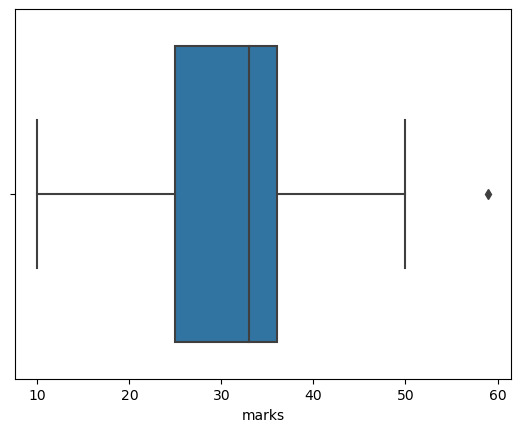

In [39]:
sns.boxplot(x=df["marks"])
plt.show()

In [40]:
df1=pd.DataFrame({"marks":[10,20,30,40,54,34,56,78,90,34,35,27,17]})
df1
                        

,marks
0,10
1,20
2,30
3,40
4,54
5,34
6,56
7,78
8,90
9,34


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

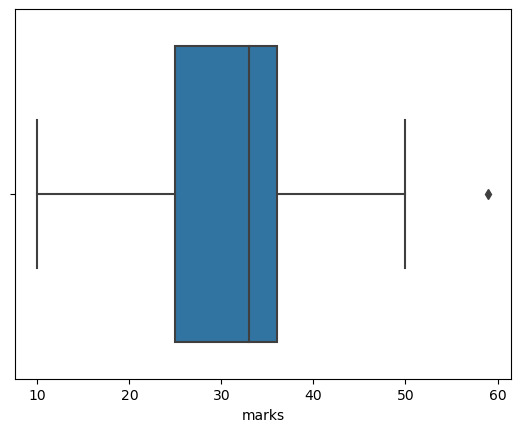

In [42]:
sns.boxplot(x=df["marks"])
plt.show()

In [49]:
df3=pd.DataFrame({"marks-1":[11,12,13,14,15,16,17,18,19,20]})
df3

,marks-1
0,11
1,12
2,13
3,14
4,15
5,16
6,17
7,18
8,19
9,20


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

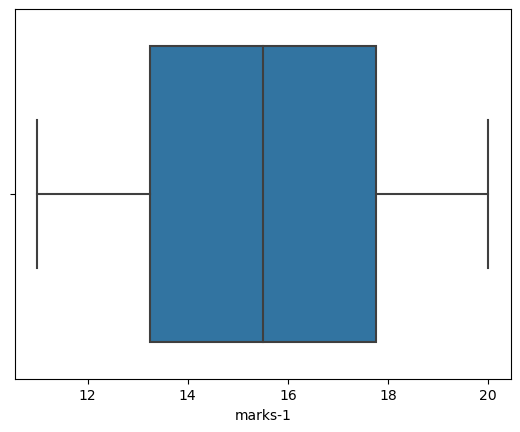

In [51]:
sns.boxplot(x=df3["marks-1"])
plt.show()

In [52]:
# calculate Q1
Q1=df["marks"].quantile(0.25)
print("Q1:",Q1)

#calulate Q3
Q3=df["marks"].quantile(0.75)
print("Q3",Q3)

#calculate IQR

IQR=Q3-Q1
print("IQR",IQR)

#calculate Lower_limit of outlier
lower_limit=Q1-(IQR*1.5)
print("lower limit",lower_limit)

#caluclate the upper limit of outlier
upper_limit=Q3+(IQR*1.5)
print("upper limit",upper_limit)


Q1: 25.0
Q3 36.0
IQR 11.0
lower limit 8.5
upper limit 52.5


In [53]:
df[(df["marks"]<lower_limit)|(df["marks"]>upper_limit)]

,marks
14,59


In [54]:
df.drop(index=14)

,marks
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


In [59]:
from feature_engine.outliers import Winsorizer 

win=Winsorizer(capping_method='iqr',tail='both',fold=1.5)

win.fit_transform(df[["marks"]])

ModuleNotFoundError: No module named 'feature_engine'